In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
database = pd.read_excel("cost_function.xlsx")
database.head(5)

,Name,Study Hours,Actual Score,Predicted Score
0,Steven Mitchell,4.37,48.97,44.38
1,Donald Smith,9.56,99.67,95.37
2,Dr. Vincent Case DDS,7.59,81.15,72.50
3,Amanda Martin,6.39,62.92,70.65
4,Kimberly Lyons,2.40,28.38,28.51


In [3]:
database.drop("Name", axis=1, inplace=True)
database.head(5)

,Study Hours,Actual Score,Predicted Score
0,4.37,48.97,44.38
1,9.56,99.67,95.37
2,7.59,81.15,72.50
3,6.39,62.92,70.65
4,2.40,28.38,28.51


In [4]:
database.shape

(100, 3)

In [5]:
database.isnull().sum()

Study Hours        0
Actual Score       0
Predicted Score    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x = database.iloc[:, 0:-1]
y = database["Predicted Score"]

In [11]:
y

0     44.38
1     95.37
2     72.50
3     70.65
4     28.51
      ...  
95    49.69
96    59.83
97    48.66
98    13.11
99    24.13
Name: Predicted Score, Length: 100, dtype: float64

In [12]:
ss = StandardScaler()
ss.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [13]:
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
lr.score(x_test, y_test)*100

96.94486748865509

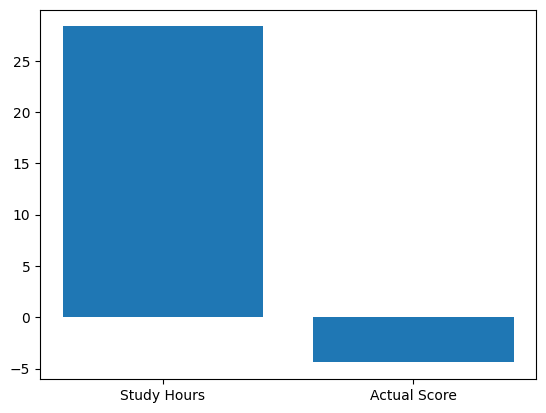

In [28]:
plt.bar(x.columns, lr.coef_)
plt.show()

In [ ]:
ls = Lasso(alpha=0.5)
ls.fit(x_train, y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [22]:
ls.score(x_test, y_test)*100

97.11470451945247

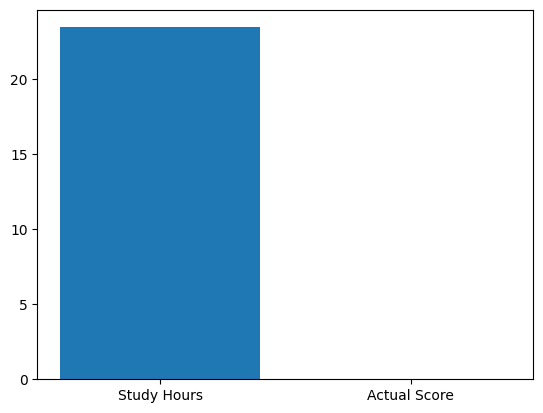

In [29]:
plt.bar(x.columns, ls.coef_)
plt.show()

In [25]:
rd = Ridge(alpha= 0.5)
rd.fit(x_train, y_train)

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [26]:
rd.score(x_test, y_test)*100

97.37315953790913

In [40]:
predicted_salary = rd.predict([[4.37, 48.97]])
print(predicted_salary[0])

345.8873270991906


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


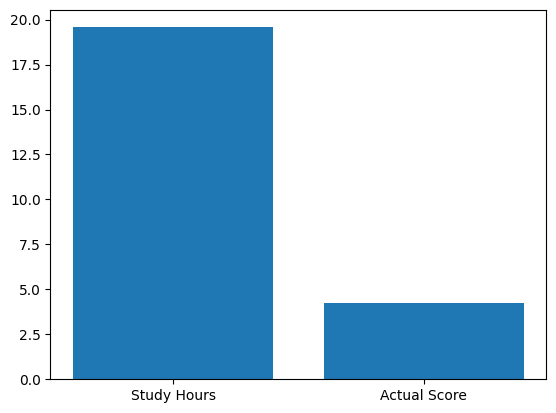

In [30]:
plt.bar(x.columns, rd.coef_)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
# Linear Regression
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
# Lasso Regression
print(mean_absolute_error(y_test, ls.predict(x_test)))
print(mean_squared_error(y_test, ls.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ls.predict(x_test))))
# Ridge Regression
print(mean_absolute_error(y_test, rd.predict(x_test)))
print(mean_squared_error(y_test, rd.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, rd.predict(x_test))))

3.546844291194469
20.290522122017798
4.5045002077941785
3.1922301247530287
19.162557289809925
4.377505829785944
3.0775132998926096
17.446040166553296
4.17684571974514


In [36]:
df = pd.DataFrame({
	"Col_name": x.columns,
	"Linear Regression": lr.coef_,
	"Lasso Regression": ls.coef_,
	"Ridge Regression": rd.coef_
})

In [37]:
df

,Col_name,Linear Regression,Lasso Regression,Ridge Regression
0,Study Hours,28.340808,23.429861,19.573722
1,Actual Score,-4.409226,0.000000,4.260436
